# XGBoost Model
## XGBoost is a gradient boosted decision trees designed for speeding up the performance that is dominative competitive machine learning.

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on the major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

#### 1 . 
first step you need to take is to install XGBoost on your system .
you can refer the following link to install it
https://anaconda.org/conda-forge/xgboost


#### 2. Problem Description: Predict Onset of Diabetes

Basically I am going to use Pima Indians onset of diabetes dataset.
This dataset is comprised of 8 input variables that describe medical details of patients and one output variable to indicate whether the patient will have an onset of diabetes within 5 years.
In this data set all the input variables are numeric hare and problem is simple binary classification problem


#### 3. Load and prepare data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
dataset = pd.read_csv('pima-indians-diabetes.csv', delimiter = ',')

In [20]:
dataset.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [36]:
dataset.columns

Index(['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1'], dtype='object')

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
6        767 non-null int64
148      767 non-null int64
72       767 non-null int64
35       767 non-null int64
0        767 non-null int64
33.6     767 non-null float64
0.627    767 non-null float64
50       767 non-null int64
1        767 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [22]:
corr = dataset.corr()

In [23]:
corr

,6,148,72,35,0,33.6,0.627,50,1
6,1.000000,0.128846,0.141197,-0.082495,-0.072999,0.017518,-0.033927,0.544018,0.221087
148,0.128846,1.000000,0.152498,0.056381,0.332383,0.220955,0.136903,0.262408,0.465856
72,0.141197,0.152498,1.000000,0.207308,0.089098,0.281777,0.041180,0.239571,0.064882
35,-0.082495,0.056381,0.207308,1.000000,0.437974,0.392553,0.183498,-0.115873,0.073265
0,-0.072999,0.332383,0.089098,0.437974,1.000000,0.198111,0.185579,-0.040942,0.131984
33.6,0.017518,0.220955,0.281777,0.392553,0.198111,1.000000,0.140546,0.035911,0.292695
0.627,-0.033927,0.136903,0.041180,0.183498,0.185579,0.140546,1.000000,0.032738,0.173245
50,0.544018,0.262408,0.239571,-0.115873,-0.040942,0.035911,0.032738,1.000000,0.236417
1,0.221087,0.465856,0.064882,0.073265,0.131984,0.292695,0.173245,0.236417,1.000000


In [24]:
import seaborn as sns

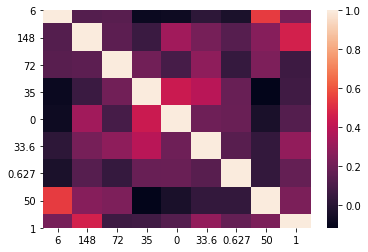

In [25]:
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns)

In [37]:
# split data into train and test
y=dataset['1']     # Dependent Variable
X=dataset.drop(['1'],axis=1) # Independent Variables

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 8 columns):
6        767 non-null int64
148      767 non-null int64
72       767 non-null int64
35       767 non-null int64
0        767 non-null int64
33.6     767 non-null float64
0.627    767 non-null float64
50       767 non-null int64
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [39]:
# use train_test_split() function from the scikit-learn library.
from sklearn.model_selection import train_test_split


In [54]:
x_train, X_trest, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

#### 4 . Train XGBoost Model
XGBoost provides a wrapper class to allow models to be treated like classifiers or regressors in the scikit-learn framework.
The XGBoost model for classification is called XGBClassifier. We can create and and fit it to our training dataset. Models are fit using the scikit-learn API and the model.fit() function.

In [55]:
# fit the model on training data
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False)

In [56]:
model.fit(x_train, y_train)

[16:25:31] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [57]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)


#### 5. Make Predictions with XGBoost Model

In [58]:
y_pred = model.predict(X_trest)
predictions = [round(value) for value in y_pred]

In [59]:
from sklearn.metrics import accuracy_score


In [60]:
accuracy = accuracy_score(y_test, predictions)
accuracy
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

0.7142857142857143

In [61]:
# here XGBoost model is giving 71% of accuracy for classification model